In [1]:
import numpy as np 
import pandas as pd
import plotly.graph_objects as go
import datetime
from datetime import timedelta
import requests

In [2]:
import os
from IPython.display import Image

In [3]:
today = pd.to_datetime('today').strftime("%m-%d-%Y")
daybefore = (datetime.date.today() - timedelta(days=1)).strftime("%m-%d-%Y")
print(today)
print(daybefore)

04-14-2020
04-13-2020


In [4]:
url_today='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + today + '.csv'
url_daybefore='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/' + daybefore + '.csv'
print(url_today)
print(url_daybefore)

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-14-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-13-2020.csv


In [5]:
request = requests.get(url_today)
if request.status_code == 200:
    url = url_today
    date = pd.to_datetime('today').strftime('%d.%m.%Y')
    date2 = datetime.date.today().strftime('%Y%m%d')
else:
    url = url_daybefore
    date = (datetime.date.today() - timedelta(days=1)).strftime('%d.%m.%Y')
    date2 = (datetime.date.today() - timedelta(days=1)).strftime('%Y%m%d')
    
print(url)
print(date)
print(date2)

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-13-2020.csv
13.04.2020
20200413


In [6]:
world = pd.read_csv(url)
world

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-13 23:07:54,34.223334,-82.461707,9,0,0,9,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-13 23:07:54,30.295065,-92.414197,101,5,0,96,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-13 23:07:54,37.767072,-75.632346,15,0,0,15,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-13 23:07:54,43.452658,-116.241552,517,6,0,511,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-13 23:07:54,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
2997,NaN,NaN,NaN,West Bank and Gaza,2020-04-13 23:07:34,31.952200,35.233200,308,2,58,248,West Bank and Gaza
2998,NaN,NaN,NaN,Western Sahara,2020-04-13 23:07:34,24.215500,-12.885800,6,0,0,6,Western Sahara
2999,NaN,NaN,NaN,Yemen,2020-04-13 23:07:34,15.552727,48.516388,1,0,0,1,Yemen
3000,NaN,NaN,NaN,Zambia,2020-04-13 23:07:34,-13.133897,27.849332,45,2,30,13,Zambia


In [7]:
data = world.groupby('Country_Region')['Confirmed','Deaths','Recovered','Active'].sum().sort_values(by=['Confirmed'], ascending=False)
data

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,580619,23529,43482,615608
Spain,170099,17756,64727,87616
Italy,159516,20465,35435,103616
France,137875,14986,28001,94888
Germany,130072,3194,64300,62578
...,...,...,...,...
Timor-Leste,4,0,1,3
Sao Tome and Principe,4,0,0,4
South Sudan,4,0,0,4


In [8]:
#data.to_csv (r'death.csv', index = True, header=True)

In [9]:
translate = pd.read_csv('translate.csv')
for i in range(len(translate['translate'])):
    translate['translate'][i] = translate['translate'][i][7:]
    
translate = translate.set_index('Country_Region')
translate

,translate
Country_Region,
US,США
Spain,Испания
Italy,Италия
France,Франция
Germany,Германия
...,...
Gambia,Гамбия
Burundi,Бурунди
South Sudan,Южный Судан


In [10]:
data = pd.concat([data, translate], axis=1, join='inner')
data

,Confirmed,Deaths,Recovered,Active,translate
Country_Region,,,,,
US,580619,23529,43482,615608,США
Spain,170099,17756,64727,87616,Испания
Italy,159516,20465,35435,103616,Италия
France,137875,14986,28001,94888,Франция
Germany,130072,3194,64300,62578,Германия
...,...,...,...,...,...
Bhutan,5,0,2,3,Бутан
Timor-Leste,4,0,1,3,Восточный Тимор
Sao Tome and Principe,4,0,0,4,Сан-Томе и Принсипи


In [11]:
top = data[:10]
top

,Confirmed,Deaths,Recovered,Active,translate
Country_Region,,,,,
US,580619,23529,43482,615608,США
Spain,170099,17756,64727,87616,Испания
Italy,159516,20465,35435,103616,Италия
France,137875,14986,28001,94888,Франция
Germany,130072,3194,64300,62578,Германия
United Kingdom,89570,11347,304,77919,Великобритания
China,83213,3345,78039,1829,Китай
Iran,73303,4585,45983,22735,Иран
Turkey,61049,1296,3957,55796,Турция


In [12]:
others = data[11:]
others

,Confirmed,Deaths,Recovered,Active,translate
Country_Region,,,,,
Switzerland,25688,1138,13700,10850,Швейцария
Canada,25680,780,7758,17142,Канада
Brazil,23430,1328,173,21929,Бразилия
Russia,18328,148,1470,16710,Россия
Portugal,16934,535,277,16122,Португалия
...,...,...,...,...,...
Bhutan,5,0,2,3,Бутан
Timor-Leste,4,0,1,3,Восточный Тимор
Sao Tome and Principe,4,0,0,4,Сан-Томе и Принсипи


In [13]:
russia = pd.DataFrame(data.loc['Russia']).T
russia

,Confirmed,Deaths,Recovered,Active,translate
Russia,18328,148,1470,16710,Россия


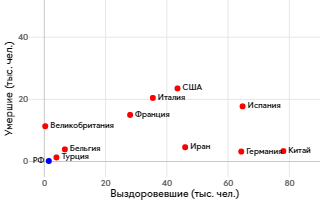

In [18]:
fig2.write_image("images/covid19-Confirmedanddeath.png", scale = 5)
img_bytes = fig2.to_image(format="png")
from IPython.display import Image
Image(img_bytes)